# EXTENDED PROJECT - DATA MINING - MARRIPALLY RAVIKUMAR 

## PROBLEM 1: CLUSTERING

* The dataset given is about the Health and economic conditions in different States of a country. The Group States based on how similar their situation is, so as to provide these groups to the government so that appropriate measures can be taken to escalate their Health and Economic conditions.

### Q 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, etc.,)

### Importing all Required Libraries

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [215]:
df=pd.read_csv('State_wise_Health_income-1.csv')

In [216]:
df.head()

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22


In [217]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [218]:
df.head()

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,Bachevo,417,66,564,1823
1,Balgarchevo,1485,646,2710,73662
2,Belasitsa,654,299,1104,27318
3,Belo_Pole,192,25,573,250
4,Beslen,43,8,528,22


In [219]:
df.shape

(297, 5)

In [220]:
df.duplicated().sum()

0

In [221]:
pd.DataFrame(df.dtypes,columns=['Data_Type']).rename_axis(index='Feature')

,Data_Type
Feature,
States,object
Health_indeces1,int64
Health_indices2,int64
Per_capita_income,int64
GDP,int64


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   States             297 non-null    object
 1   Health_indeces1    297 non-null    int64 
 2   Health_indices2    297 non-null    int64 
 3   Per_capita_income  297 non-null    int64 
 4   GDP                297 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 11.7+ KB


In [223]:
df.describe().round(2)

,Health_indeces1,Health_indices2,Per_capita_income,GDP
count,297.00,297.00,297.00,297.00
mean,2630.15,693.63,2156.92,174601.12
std,2038.51,468.94,1491.85,167167.99
min,-10.00,0.00,500.00,22.00
25%,641.00,175.00,751.00,8721.00
50%,2451.00,810.00,1865.00,137173.00
75%,4094.00,1073.00,3137.00,313092.00
max,10219.00,1508.00,7049.00,728575.00


In [224]:
df.States.value_counts()

Dromore          2
GibsonHill       1
Drumsurn         1
Ilinden          1
Cogry            1
                ..
Krandzhilitsa    1
Zheleznitsa      1
Petrelik         1
Craigavon        1
Conlig           1
Name: States, Length: 296, dtype: int64

## Exploratory Data Analysis

### Checking for null values

In [225]:
pd.DataFrame(df.isnull().sum(),columns=['Count_of_Null_Values']).rename_axis(index='Feature')

,Count_of_Null_Values
Feature,
States,0
Health_indeces1,0
Health_indices2,0
Per_capita_income,0
GDP,0


* There are no null values in the given dataset.

### Checking for duplicate observations

In [226]:
df.duplicated().sum()

0

### Checking for Outliers 

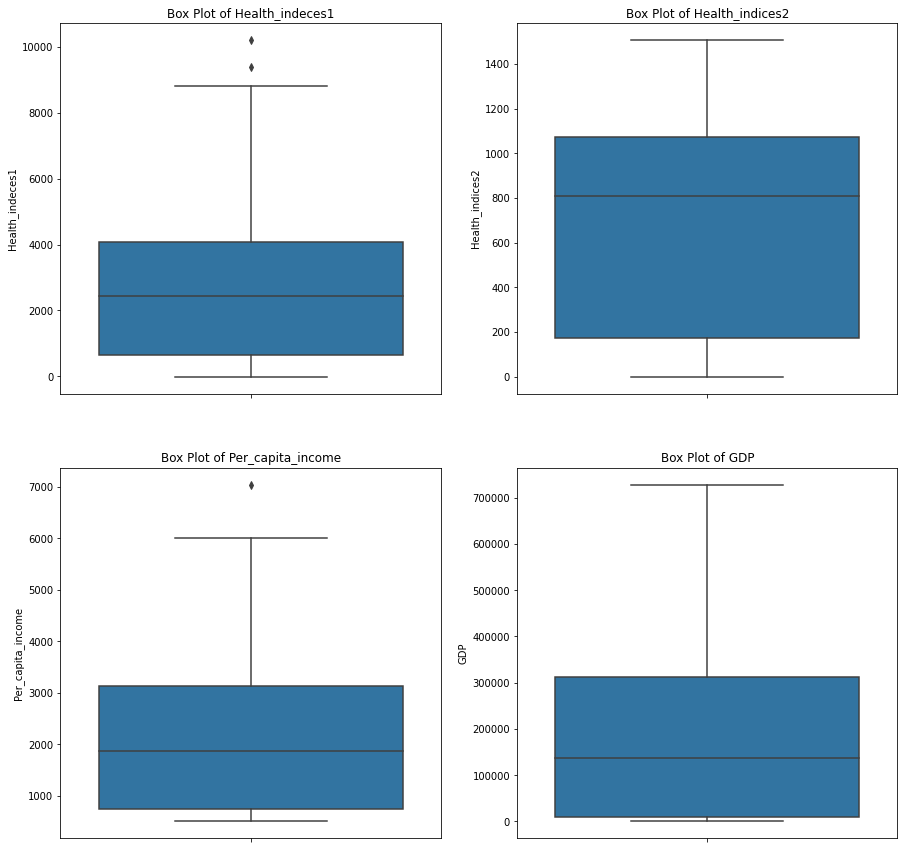

In [227]:
plt.figure(figsize=(15,15))
j=1
for i in df.columns.drop('States'):
    plt.subplot(2,2,j)
    sns.boxplot(y=df[i]);
    plt.title('Box Plot of '+i)
    j=j+1

In [228]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
ur=q3+1.5*iqr
lr=q1-1.5*iqr
a=pd.DataFrame(data=df[(df<lr)|(df>ur)].count().sort_values(ascending=False),columns=['No. of Outliers'])
a['Percentage of Outliers']=a['No. of Outliers']/df.shape[0]*100
a = a.rename_axis(index='Feature')
round(a,1)

,No. of Outliers,Percentage of Outliers
Feature,,
Health_indeces1,2,0.7
Per_capita_income,1,0.3
GDP,0,0.0
Health_indices2,0,0.0
States,0,0.0


### Insights

* There are outliers in Health Indices1 and Per capita income features.
* The outliers in Health Indices1 and Per capita income features are 0.7% and 0.3% respectively.
* Outliers are treated by capping and flooring method.

### Treating Outliers 

In [229]:
for i in df.columns.drop('States'):
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ur=q3+1.5*iqr
    lr=q1-1.5*iqr
    df[i]=np.where(df[i]>ur,ur,df[i])
    df[i]=np.where(df[i]<lr,lr,df[i])

In [230]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
ur=q3+1.5*iqr
lr=q1-1.5*iqr
b=pd.DataFrame(data=df[(df<lr)|(df>ur)].count().sort_values(ascending=False),columns=['No. of Outliers'])
b['Percentage of Outliers']=b['No. of Outliers']/df.shape[0]*100
b = b.rename_axis(index='Feature')
round(b,1)

,No. of Outliers,Percentage of Outliers
Feature,,
GDP,0,0.0
Per_capita_income,0,0.0
Health_indices2,0,0.0
Health_indeces1,0,0.0
States,0,0.0


### Univariate Analysis

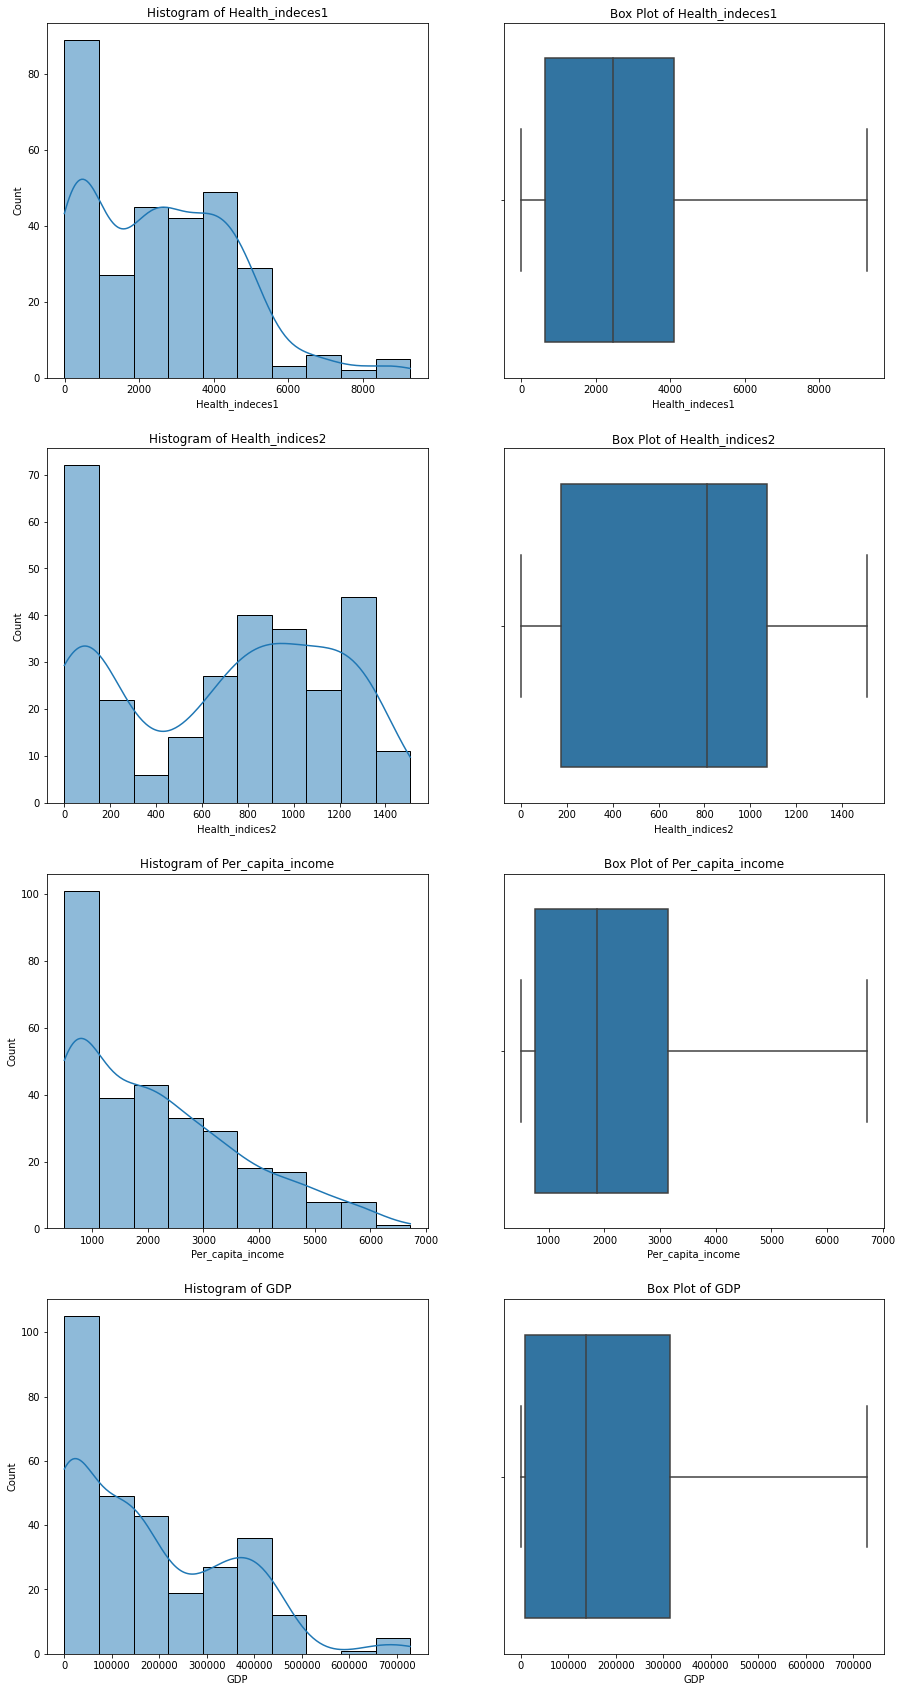

In [231]:
plt.figure(figsize=(15,30))
j=1
for i in df.columns.drop('States'):
    plt.subplot(4,2,j)
    sns.histplot(df[i],kde=True);
    plt.title('Histogram of '+i)
    k=j+1
    plt.subplot(4,2,k)
    sns.boxplot(df[i]);
    plt.title('Box Plot of '+i)
    j=k+1

### Skewness

In [232]:
pd.DataFrame(df.skew(),columns=['skewness']).round(2).rename_axis(index='Feature')

,skewness
Feature,
Health_indeces1,0.67
Health_indices2,-0.17
Per_capita_income,0.81
GDP,0.83


### Kurtosis

In [233]:
pd.DataFrame(df.kurtosis(),columns=['kurtosis']).round(2).rename_axis(index='Feature')

,kurtosis
Feature,
Health_indeces1,0.22
Health_indices2,-1.40
Per_capita_income,-0.19
GDP,0.06


### Insights:

From above plots and tables, we can conclude below points,
1.	Except Health Indeces2 feature, all other features are right skewed distributions (Positively skewed).
2.	Health Indeces1 and GDP features have positive kurtosis.
3.	Health Indeces2 and Per capita income features have negative kurtosis.

## Bivariate Analysis

### Pair Plot

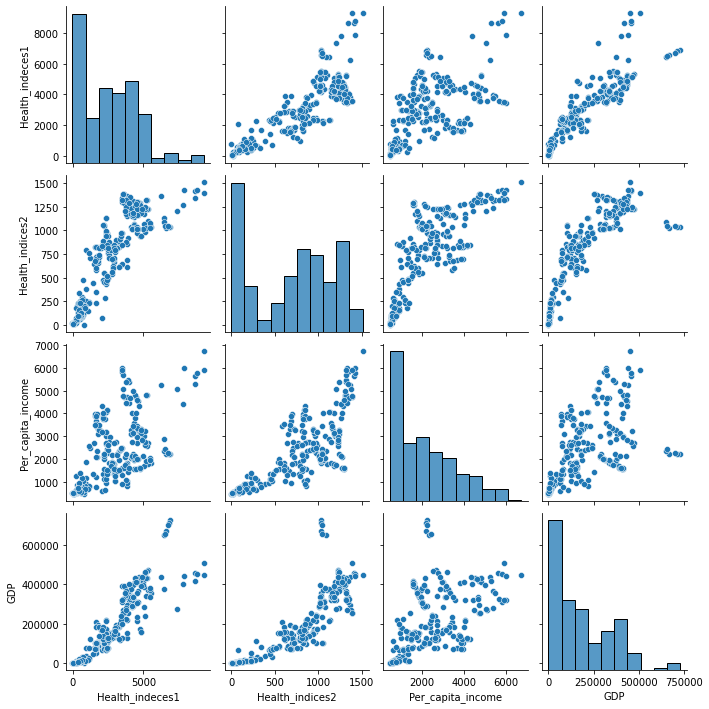

In [234]:
sns.pairplot(data=df);

### Heat Map

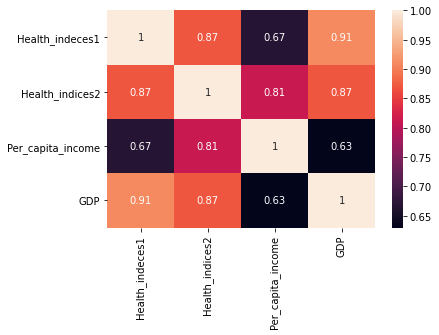

In [235]:
sns.heatmap(df.corr(),annot=True);

### Insights:

From above Pair-Plot and Heatmap, we can conclude below points,
1.	Few features have strong correlation between them like Health indeces1 & GDP (0.91), Health indeces2 & GDP (0.87).
2.	Few features have moderate correlation between them like Health indeces1 & Per capita income (0.67), GDP & Per capita income (0.63).

### Q 1.2  Do you think scaling is necessary for clustering in this case? Justify

In [236]:
c=df.describe().T
c=c[['mean','std','min','max']]
c['variance']=c['std']**2
c = c.rename_axis(index='Feature')
round(c,1)

,mean,std,min,max,variance
Feature,,,,,
Health_indeces1,2626.5,2025.9,-10.0,9273.5,4.104160e+06
Health_indices2,693.6,468.9,0.0,1508.0,2.199088e+05
Per_capita_income,2155.8,1488.3,500.0,6716.0,2.214995e+06
GDP,174601.1,167168.0,22.0,728575.0,2.794514e+10


* Generally, Scaling improves the performance of all distance-based models because if we don’t scale the data, it gives higher weightage to features which have higher magnitude. Hence, it is always advisable to bring all the features to the same scale before proceeding to distance-based algorithms like Agglomerative clustering and K-Means Clustering.
* In this dataset, the magnitudes of the statistical parameters like Mean, Standard Deviation, Variance, Minimum and Maximum are significantly different for all features (Refer below table). Hence, scaling is required to bring all the features into a common scale before proceeding to clustering.
* We can use z-score method to scale the data i.e., finding z-score value for each and every observation in the dataset by using following formula.
         Z Score=((x-µ))/Sigma
         Where, x = Value of the observation
		 µ = Mean
		 Sigma = Standard Deviation

### Q 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

### Scaling the Data by Using Z-Score Method

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
ss=StandardScaler()
dfscaled=pd.DataFrame(ss.fit_transform(df.drop('States',axis=1)),columns=df.columns.drop('States'))

### Sample of the Scaled Dataset

In [26]:
dfscaled.head()

,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,-1.092498,-1.340654,-1.071354,-1.035304
1,-0.564428,-0.101746,0.373007,-0.604838
2,-0.975314,-0.842955,-0.707908,-0.882536
3,-1.203748,-1.428232,-1.065297,-1.044730
4,-1.277421,-1.464545,-1.095584,-1.046096


In [27]:
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

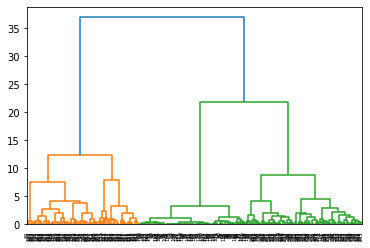

In [28]:
lk=linkage(dfscaled,method='ward')
dgrm=dendrogram(lk)

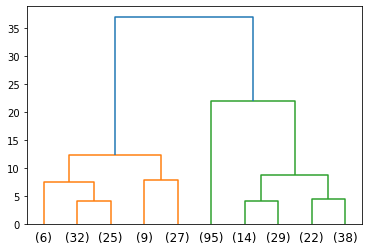

In [29]:
lk=linkage(dfscaled,method='ward')
dgrm=dendrogram(lk,p=10,truncate_mode='lastp')

### Selecting the Optimum Number of Clusters:
* From above Truncated Dendrogram, it can be noticed that the distance or increase in within sum squares (WSS) is large (length of blue line) to merge last two clusters into single final cluster. 
* Hence, we can select the optimum number of clusters are two. But according the business, making two clusters will not add any additional benefit over without clustering. So, it is not correct.
* The next optimum number of clusters selected based on distance (length of green line) or increase in within sum squares (WSS) are three.

In [30]:
Hclusters=fcluster(lk,3,criterion='maxclust')
Hclusters

array([2, 3, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 3, 2,
       2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 1, 2, 2, 1, 3, 2, 3, 2, 2, 3, 3,
       3, 2, 2, 1, 2, 2, 2, 3, 2, 1, 2, 3, 3, 2, 2, 3, 3, 2, 2, 1, 3, 2,
       3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2,
       2, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 1, 2, 3, 2, 3, 3, 2, 2,
       2, 1, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 1, 2, 3, 2, 2, 3, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 1, 2, 3, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int3

In [31]:
dfhc=df.copy()

In [32]:
dfhc['Hclusters']=Hclusters

In [33]:
dfhc.head()

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP,Hclusters
0,Bachevo,417.0,66.0,564.0,1823.0,2
1,Balgarchevo,1485.0,646.0,2710.0,73662.0,3
2,Belasitsa,654.0,299.0,1104.0,27318.0,2
3,Belo_Pole,192.0,25.0,573.0,250.0,2
4,Beslen,43.0,8.0,528.0,22.0,2


In [34]:
dfhc.Hclusters.value_counts()

3    103
1     99
2     95
Name: Hclusters, dtype: int64

### Customer Segmentation

In [35]:
dfhc.groupby(by='Hclusters').mean().round(1)

,Health_indeces1,Health_indices2,Per_capita_income,GDP
Hclusters,,,,
1,4912.7,1201.6,3371.8,377132.5
2,401.1,104.5,680.7,5388.8
3,2481.8,748.7,2347.6,136004.7


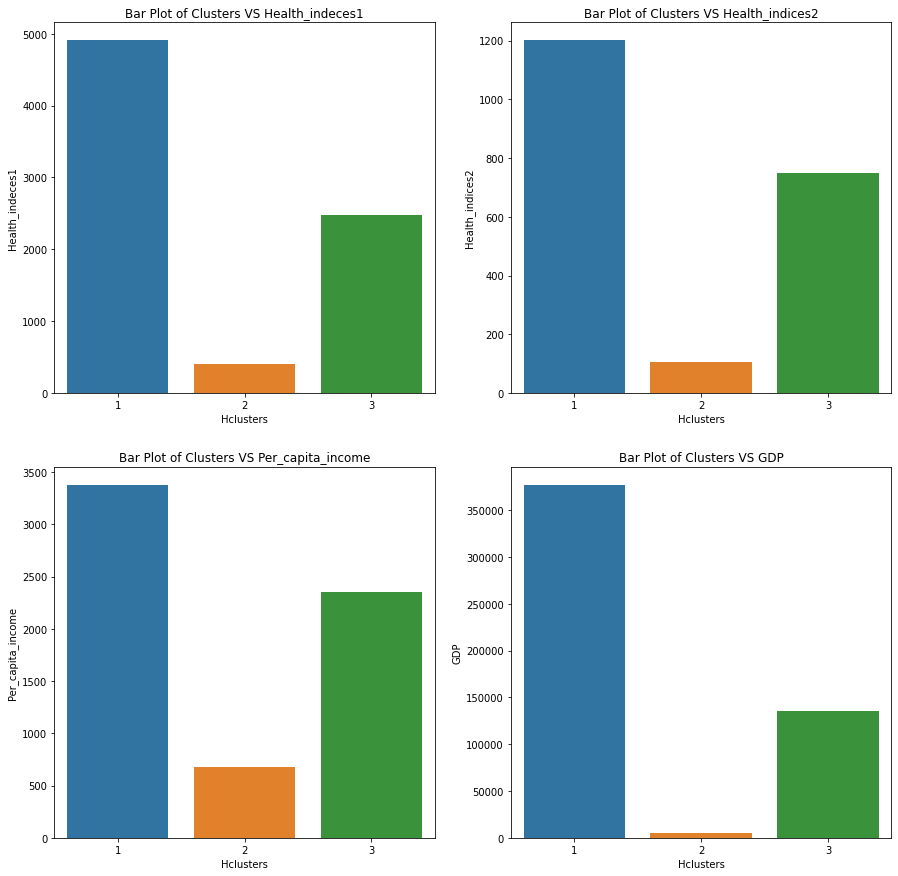

In [36]:
plt.figure(figsize=(15,15))
j=1
for i in dfhc.columns.drop(['Hclusters','States']):
    plt.subplot(2,2,j)
    #t=dfhc.groupby('Hclusters').mean().sort_values(i,ascending=False)
    sns.barplot(y=dfhc[i],x=dfhc.Hclusters,ci=False);
    plt.title('Bar Plot of Clusters VS '+i)
    j=j+1

### Insights:
The coordinates of each cluster’s centroid are shown in table 11 so that means of each feature in different clusters can be compared. From above table and bar plots, we can write below conclusions. 
* Means of all features decreases in the order of cluster1, cluster3, cluster2.
* The states in cluster 1 have high health indices, high Per capita income and high GDP.
* The states in cluster 2 have low health indices, low Per capita income and low GDP.
* The states in cluster 3 have moderate health indices, moderate Per capita income and moderate GDP.

### Visualization of Hierarchical Clusters

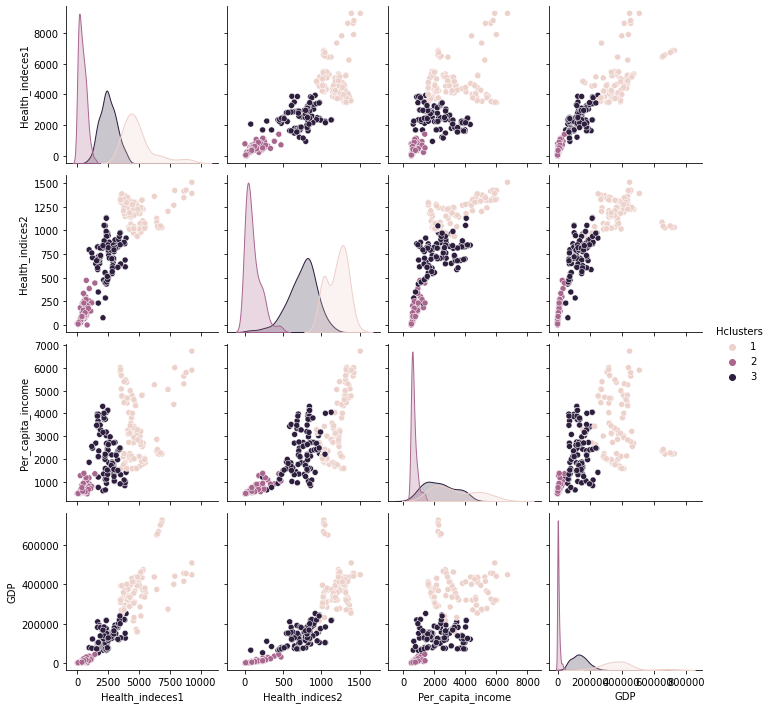

In [37]:
sns.pairplot(data=dfhc,hue='Hclusters');

* The above pair plot indicates that all customers are properly segregated into three clusters based on their similarities.

### Q 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

### Optimum No. of Clusters by Elbow Plot Method

In [39]:
# wss--within sum squares
wss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=1,max_iter=1000)
    km.fit(dfscaled)
    wss.append(km.inertia_)

In [40]:
u=pd.DataFrame(wss,columns=['WSS'])
u['Number_of_Clusters']=range(1,11)

In [41]:
u=u[['Number_of_Clusters','WSS']]
u.round(2)

,Number_of_Clusters,WSS
0,1,1188.00
1,2,469.38
2,3,258.45
3,4,181.74
4,5,147.73
5,6,116.60
6,7,90.01
7,8,78.99
8,9,70.09
9,10,63.15


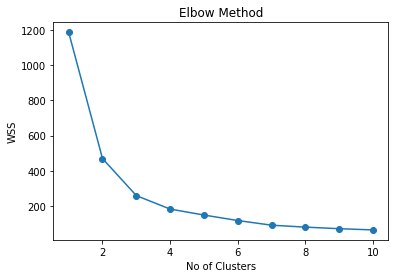

In [42]:
plt.plot(range(1,11),wss,marker='o');
plt.xlabel('No of Clusters');
plt.ylabel('WSS');
plt.title('Elbow Method');

### Optimum No. of Clusters by Silhouette Score Method

In [43]:
# silscore--silhouette_score
silscore=[]
for i in range(2,11):
    km=KMeans(n_clusters=i,random_state=1,max_iter=1000)
    km.fit(dfscaled)
    silscore.append(silhouette_score(dfscaled,km.labels_))

In [44]:
v=pd.DataFrame(silscore,columns=['Silhouette_Score'])
v['Number_of_Clusters']=range(2,11)

In [45]:
v=v[['Number_of_Clusters','Silhouette_Score']]
v.round(2)

,Number_of_Clusters,Silhouette_Score
0,2,0.53
1,3,0.53
2,4,0.55
3,5,0.52
4,6,0.53
5,7,0.56
6,8,0.53
7,9,0.51
8,10,0.49


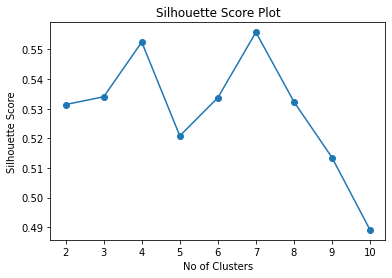

In [46]:
plt.plot(range(2,11),silscore,marker='o');
plt.xlabel('No of Clusters');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score Plot');

#### Optimum No. of Clusters
* Pending

In [47]:
# For three clusters
kmf=KMeans(n_clusters=3,random_state=1)
kmf.fit(dfscaled)

KMeans(n_clusters=3, random_state=1)

In [48]:
kmclusters=kmf.labels_
kmclusters

array([0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0,
       0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [49]:
dfkmc=dfhc.copy()

In [50]:
dfkmc['kmclusters']=kmclusters

In [51]:
dfkmc.drop('Hclusters',axis=1).head()

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP,kmclusters
0,Bachevo,417.0,66.0,564.0,1823.0,0
1,Balgarchevo,1485.0,646.0,2710.0,73662.0,1
2,Belasitsa,654.0,299.0,1104.0,27318.0,0
3,Belo_Pole,192.0,25.0,573.0,250.0,0
4,Beslen,43.0,8.0,528.0,22.0,0


### Sil Width

In [52]:
dfscaled.shape

(297, 4)

In [53]:
sill_width=silhouette_samples(dfscaled,kmclusters).round(4)
sill_width

array([ 0.8788,  0.429 ,  0.6909,  0.8761,  0.8619,  0.8667,  0.8779,
        0.329 ,  0.8409,  0.5778,  0.8801,  0.8741,  0.8626,  0.8008,
        0.5974,  0.8191,  0.2886,  0.7665,  0.7406,  0.3216,  0.6116,
        0.8459,  0.8351,  0.8693,  0.5616,  0.8272,  0.5628,  0.4988,
        0.4535,  0.8679,  0.1716,  0.8762,  0.8617, -0.0248,  0.8737,
        0.8582,  0.3459,  0.0849,  0.8269,  0.6378,  0.8673,  0.7316,
        0.4681,  0.3233,  0.3569,  0.8123,  0.8066,  0.2004,  0.8788,
        0.8662,  0.8789,  0.5544,  0.8779,  0.4058,  0.8776,  0.594 ,
        0.5368,  0.8667,  0.8799,  0.4769,  0.4489,  0.685 ,  0.7269,
        0.4814,  0.2338,  0.8672,  0.3732,  0.8722,  0.8312,  0.8641,
        0.8608,  0.2778,  0.874 ,  0.8713,  0.8787,  0.855 ,  0.6109,
        0.4762,  0.7922,  0.8666,  0.8785,  0.8673,  0.8812,  0.8289,
        0.5139,  0.5994,  0.8701,  0.8728,  0.7904,  0.3626,  0.8807,
        0.8691,  0.8786,  0.3295,  0.5034,  0.8089,  0.475 ,  0.8722,
        0.318 ,  0.0

In [54]:
print('Maximum Sill Width', silhouette_samples(dfscaled,kmclusters).max().round(3))
print('Minimum Sill Width', silhouette_samples(dfscaled,kmclusters).min().round(3))
print('Average Sill Width', silhouette_samples(dfscaled,kmclusters).mean().round(3))

Maximum Sill Width 0.882
Minimum Sill Width -0.081
Average Sill Width 0.534


In [55]:
sill_width[sill_width<0]

array([-0.0248, -0.0177, -0.0118, -0.0805])

## Customer Segmentation

In [56]:
dfkmc.kmclusters.value_counts()

1    101
0    101
2     95
Name: kmclusters, dtype: int64

In [57]:
dfkmc.drop('Hclusters',axis=1).groupby('kmclusters').mean().round(1)

,Health_indeces1,Health_indices2,Per_capita_income,GDP
kmclusters,,,,
0,499.2,116.4,693.8,9428.1
1,2597.1,783.0,2464.1,141264.1
2,4919.6,1212.3,3382.3,385648.6


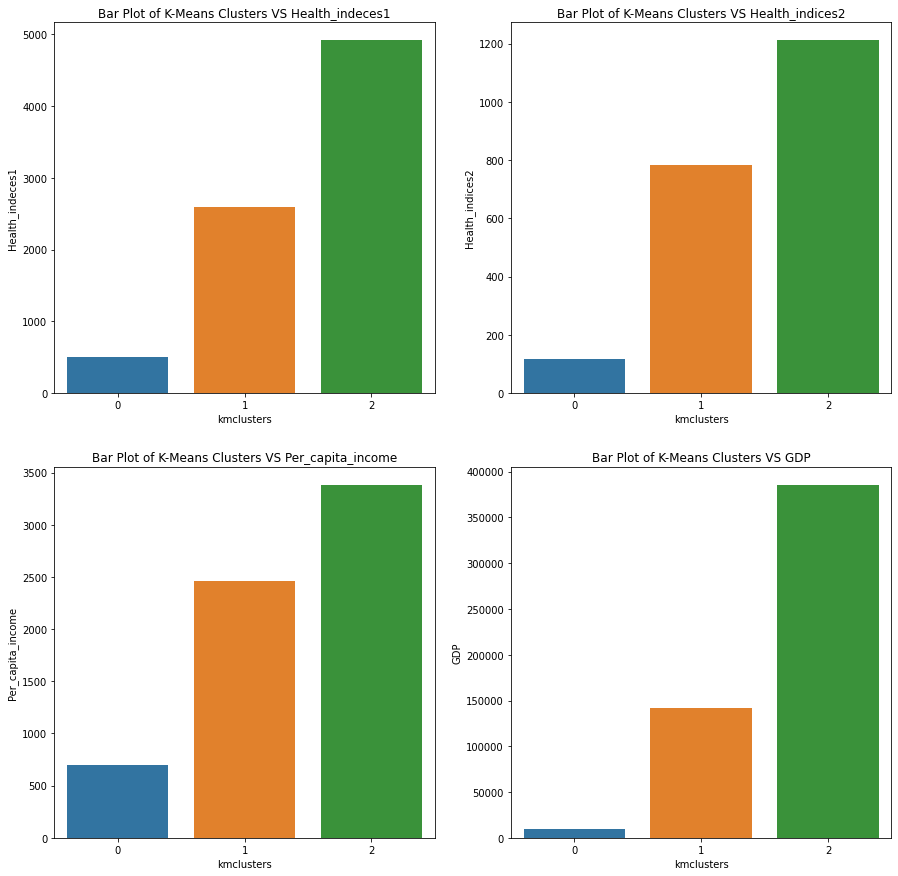

In [58]:
plt.figure(figsize=(15,15))
j=1
for i in dfkmc.columns.drop(['States','Hclusters','kmclusters']):
    plt.subplot(2,2,j)
    sns.barplot(y=dfkmc[i],x=dfkmc.kmclusters,ci=False);
    plt.title('Bar Plot of K-Means Clusters VS '+i)
    j=j+1

### Insights:
The coordinates of each cluster’s centroid are shown in table 15 so that means of each feature in different clusters can be compared. From above table and bar plots, we can write below conclusions. 
* Means of all features increases in the order of cluster 0, cluster 1 and cluster 2.
* The states in cluster 2 have high health indices, high Per capita income and high GDP.
* The states in cluster 0 have low health indices, low Per capita income and low GDP.
* The states in cluster 1 have moderate health indices, moderate Per capita income and moderate GDP.

### Visualization of K-Means Clusters

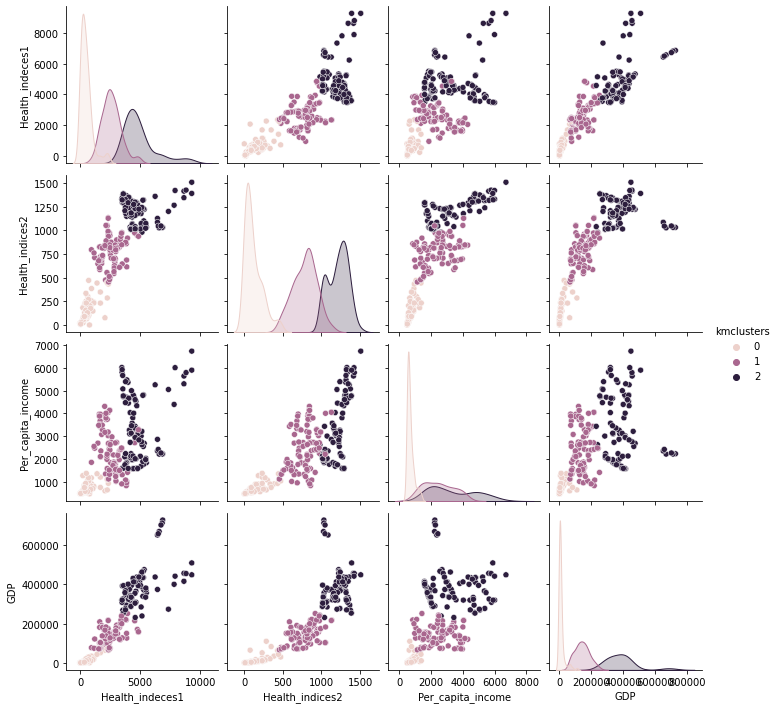

In [59]:
sns.pairplot(data=dfkmc.drop('Hclusters',axis=1),hue='kmclusters');

* The above pair plot indicates that all customers are properly segregated into three clusters based on their similarities.

In [60]:
dfkmc.kmclusters.value_counts()

1    101
0    101
2     95
Name: kmclusters, dtype: int64

In [61]:
dfkmc[dfkmc.kmclusters==0].States.unique()

array(['Bachevo', 'Belasitsa', 'Belo_Pole', 'Beslen', 'Bogolin',
       'Bogoroditsa', 'Budiltsi', 'Churicheni', 'Churilovo', 'Debochitsa',
       'Dobarsko', 'Dobri_Laki', 'Dolen', 'Drakata', 'Drangovo', 'Garmen',
       'Gega', 'Godeshevo', 'Gyurgevo', 'Ilinden', 'Kamena', 'Klyuch',
       'Kochan', 'Kolarovo', 'Krandzhilitsa', 'Krastiltsi', 'Kulata',
       'Leshko', 'Logodazh', 'Moshtanets', 'Nikudin', 'Osina', 'Padesh',
       'Palat', 'Pletena', 'Polenitsa', 'Rupite', 'Satovcha', 'Struma',
       'Strumeshnitsa', 'Sushitsa', 'Vaklinovo', 'Valkosel', 'Vishlene',
       'Valkovo', 'Yavornitsa', 'Zanoga', 'Blagoevgrad', 'Zelenodol',
       'ZoycheneBallela', 'Ballerin', 'Ballinamallard', 'Ballintoy',
       'Balloo', 'Ballybogy', 'Ballycarry', 'Ballycastle', 'Ballyclare',
       'Ballyeaston', 'Ballygawley', 'Ballygowan', 'Ballyhalbert',
       'Ballyhornan', 'Ballykelly', 'Ballykinler', 'Ballylinney',
       'Ballymacmaine', 'Ballymagorry', 'Ballymartin', 'Ballymena',
       'Bally

In [62]:
dfkmc[dfkmc.kmclusters==1].States.unique()

array(['Balgarchevo', 'Cherniche', 'Gabrovo', 'Gorna_Breznitsa',
       'Ivanovo', 'Kalimantsi', 'Krupnik', 'Lebnitsa', 'Mendovo',
       'Mihnevo', 'Mikrevo', 'Obidim', 'Petrelik', 'Pravo_Bardo',
       'Ribnik', 'Slashten', 'Starchevo', 'Suhostrel', 'Tuhovishta',
       'Volno', 'Zheleznitsa', 'Zhizhevo', 'Ballycassidy', 'Ballylesson',
       'Ballymacnab', 'Ballymoney', 'Ballynure', 'Ballyrashane',
       'Ballyskeagh', 'Ballystrudder', 'Banagher', 'Bannfoot', 'Belleek',
       'Bendooragh', 'Brockagh', 'Broomhill', 'Burnfoot', 'Camlough',
       'Kilbride', 'Cullyhanna', 'Desertmartin', 'Downhill',
       'Downpatrick', 'Draperstown', 'Drinns_Bay', 'Dromara', 'Dromintee',
       'Dromore', 'Drumaness', 'Drumbo', 'Drumlaghy', 'Drumlough',
       'Drummullan', 'Drumnacanvy', 'Drumnakilly', 'Drumquin',
       'Drumraighland', 'Drumsurn', 'Dunadry', 'Dundonald', 'Dundrod',
       'Dundrum', 'Dungannon', 'Dungiven', 'Dunloy', 'Dunnamanagh',
       'Dunmurry', 'Dunnamore', 'Dunnaval', 'D

In [63]:
dfkmc[dfkmc.kmclusters==2].States.unique()

array(['Buchino', 'Dolene', 'Fargovo', 'Kolibite', 'Kribul', 'Polena',
       'Strumyani', 'Ballygalley', 'Ballymaguigan', 'Ballyscullion',
       'Bellanaleck', 'Burren', 'Capecastle', 'Cappagh', 'Cargan',
       'Carnalbanagh', 'Carncastle', 'Carnlough', 'Carnteel',
       'Carrickaness', 'Carrickfergus', 'Carrickmore', 'Carrowclare',
       'Carrowdore', 'Carrybridge', 'Carryduff', 'Castlecaulfield',
       'Castledawson', 'Castlederg', 'Castlerock', 'Castlewellan',
       'Charlemont', 'Clabby', 'Clady', 'Cladymore', 'Clanabogan',
       'Claudy', 'Clogh', 'Clogher', 'Cloghy', 'Clonmore', 'Clonoe',
       'Clough', 'Cloughmills', 'Coagh', 'Coalisland', 'Cogry',
       'Coleraine', 'Collegeland', 'Comber', 'Conlig', 'Cookstown',
       'Corbet', 'Corkey', 'Corrinshego', 'Craigarogan', 'Craigavon',
       'Cranagh', 'Cranford', 'Crawfordsburn', 'Creagh', 'Creggan',
       'Crossgar', 'Crossmaglen', 'Crumlin', 'Cullaville', 'Cullybackey',
       'Culmore', 'Culnady', 'Curran', 'Cushen

### Q 1.5 Describe cluster profiles for the clusters defined. Recommend different priority based actions that need to be taken for different clusters on the bases of their vulnerability situations according to their Economic and Health Conditions.

### Mapping of K-Means Clusters with Hierarchical Clusters

In [64]:
dfkmc.head(10)

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP,Hclusters,kmclusters
0,Bachevo,417.0,66.0,564.0,1823.0,2,0
1,Balgarchevo,1485.0,646.0,2710.0,73662.0,3,1
2,Belasitsa,654.0,299.0,1104.0,27318.0,2,0
3,Belo_Pole,192.0,25.0,573.0,250.0,2,0
4,Beslen,43.0,8.0,528.0,22.0,2,0
5,Bogolin,69.0,14.0,527.0,73.0,2,0
6,Bogoroditsa,307.0,69.0,707.0,1724.0,2,0
7,Buchino,9273.5,1508.0,6716.0,449003.0,1,2
8,Budiltsi,744.0,115.0,809.0,7497.0,2,0
9,Cherniche,2975.0,857.0,1600.0,153299.0,3,1


In [65]:
dfhc.groupby('Hclusters').mean().round(1)

,Health_indeces1,Health_indices2,Per_capita_income,GDP
Hclusters,,,,
1,4912.7,1201.6,3371.8,377132.5
2,401.1,104.5,680.7,5388.8
3,2481.8,748.7,2347.6,136004.7


In [66]:
dfkmc.drop('Hclusters',axis=1).groupby('kmclusters').mean().round(1)

,Health_indeces1,Health_indices2,Per_capita_income,GDP
kmclusters,,,,
0,499.2,116.4,693.8,9428.1
1,2597.1,783.0,2464.1,141264.1
2,4919.6,1212.3,3382.3,385648.6


### Conclusions:
By comparing means of different features in Hierarchical Clustering & K-Means Clustering, we can notice below key points.
* Cluster 1 in Hierarchical Clustering (high health indices, high Per capita income and high GDP) is equivalent to Cluster 2 in K-Means Clustering.
* Cluster 2 in Hierarchical Clustering (low health indices, low Per capita income and low GDP) is equivalent to Cluster 0 in K-Means Clustering.
* Cluster 3 in Hierarchical Clustering (moderate health indices, moderate Per capita income and moderate GDP) is equivalent to Cluster 1 in K-Means Clustering.

### Priority-based actions:
1.	States in Kmeans cluster 2 have high health indices, high Per capita income and high GDP. Hence, we can notice that these sates may be considered as developed states. No immediate action is required by the government to improve health indices, per capita income and GDP but government should strictly keep implementing the strategies which are being already executed in healthcare and financial departments (Equivalent to Cluster 1 in Hierarchical Clustering).
2.	States in Kmeans cluster 1 have moderate health indices, moderate Per capita income and moderate GDP. Hence, we can notice that these sates may be considered as developing states. Few actions are required by the government but not immediately. Based on the budget availability, government should introduce new strategies to improve health indices, per capita income and GDP and also government should strictly keep implementing the strategies which are being already executed in healthcare and financial departments (Equivalent to Cluster 3 in Hierarchical Clustering).
3.	States in Kmeans cluster 0 have low health indices, low Per capita income and low GDP. Hence, we can notice that these sates may be considered as under developed states. Immediate actions are required by the government to develop the states in health care and financial sectors. Government should introduce new strategies to improve health indices, per capita income and GDP and also government should review the strategies which are being already executed in healthcare and financial departments and those strategies have to reformed or discontinued based on in depth analysis (Equivalent to Cluster 2 in Hierarchical Clustering).

# PROBLEM 2: CART-RF-ANN

* Mortality Outcomes for Females Suffering Myocardial Infarction. The mifem data frame has 1295 rows and 10 columns. This is a Dataset of females having Coronary Heart Disease (CHD). You have to predict with the given information whether the female is dead or alive so as to discover important factors that should be considered crucial in the treatment of the disease. Use CART, RF & ANN, and compare the models' performances in train and test sets.

## Q 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

###  Loading the Dataset

In [67]:
mrt=pd.read_csv('mifem-1.csv')

### Sample of the Dataset

In [68]:
mrt.head()

,Unnamed: 0,Unnamed: 0.1,outcome,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
0,0,1,live,63,85,n,x,n,y,y,n,n
1,1,6,live,55,85,n,c,n,y,y,n,n
2,2,8,live,68,85,y,nk,nk,y,y,y,n
3,3,10,live,64,85,n,x,n,y,n,y,n
4,4,11,dead,67,85,n,nk,nk,nk,y,nk,nk


In [69]:
mrt.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [70]:
mrt.head()

,outcome,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
0,live,63,85,n,x,n,y,y,n,n
1,live,55,85,n,c,n,y,y,n,n
2,live,68,85,y,nk,nk,y,y,y,n
3,live,64,85,n,x,n,y,n,y,n
4,dead,67,85,n,nk,nk,nk,y,nk,nk


### Size of the Dataset

In [71]:
mrt.shape

(1295, 10)

### Data Types of the Dataset

In [72]:
pd.DataFrame(mrt.dtypes,columns=['Data Type']).rename_axis(index='Feature').T

Feature,outcome,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
Data Type,object,int64,int64,object,object,object,object,object,object,object


In [73]:
mrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outcome   1295 non-null   object
 1   age       1295 non-null   int64 
 2   yronset   1295 non-null   int64 
 3   premi     1295 non-null   object
 4   smstat    1295 non-null   object
 5   diabetes  1295 non-null   object
 6   highbp    1295 non-null   object
 7   hichol    1295 non-null   object
 8   angina    1295 non-null   object
 9   stroke    1295 non-null   object
dtypes: int64(2), object(8)
memory usage: 101.3+ KB


### Summary of the Dataset

In [74]:
mrt.describe(include='all')

,outcome,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
count,1295,1295.000000,1295.000000,1295,1295,1295,1295,1295,1295,1295
unique,2,NaN,NaN,3,4,3,3,2,3,3
top,live,NaN,NaN,n,n,n,y,n,n,n
freq,974,NaN,NaN,928,522,978,813,655,724,1063
mean,NaN,60.922008,88.785328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,7.042327,2.553647,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,35.000000,85.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,57.000000,87.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,63.000000,89.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,66.000000,91.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for Missing Values

In [75]:
pd.DataFrame(mrt.isnull().sum(),columns=['Count of Null Values']).rename_axis(index='Feature').T

Feature,outcome,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
Count of Null Values,0,0,0,0,0,0,0,0,0,0


### Checking and Deleting Duplicate Obsevrations

In [76]:
mrt.duplicated().sum()

75

In [77]:
mrt.drop_duplicates(inplace=True,ignore_index=True)

In [78]:
mrt.index

RangeIndex(start=0, stop=1220, step=1)

In [79]:
mrt.shape

(1220, 10)

### Insights:
* There are 1295 observations (rows) and 10 features (columns) in the dataset.
* All features in the dataset of object type except age and yronset features
* There are 75 duplicate records (rows) in the dataset which have to be removed before proceeding to next step.
* The size of the dataset after removing duplicate records is (1220 records, 10 features).

### Checking for Anomalies

### Getting Unique Entries of All Variables

In [80]:
for i in mrt.columns:
    print('Feature:',i)
    print(mrt[i].unique())
    print('-----------------------------------------------')

Feature: outcome
['live' 'dead']
-----------------------------------------------
Feature: age
[63 55 68 64 67 66 46 59 56 60 61 69 52 62 54 57 49 53 35 65 58 45 51 43
 48 50 47 38 41 44 40 42 39 36]
-----------------------------------------------
Feature: yronset
[85 86 87 88 89 90 91 92 93]
-----------------------------------------------
Feature: premi
['n' 'y' 'nk']
-----------------------------------------------
Feature: smstat
['x' 'c' 'nk' 'n']
-----------------------------------------------
Feature: diabetes
['n' 'nk' 'y']
-----------------------------------------------
Feature: highbp
['y' 'nk' 'n']
-----------------------------------------------
Feature: hichol
['y' 'n']
-----------------------------------------------
Feature: angina
['n' 'y' 'nk']
-----------------------------------------------
Feature: stroke
['n' 'nk' 'y']
-----------------------------------------------


### Getting Unique Counts of All Categorical Variables

In [81]:
for i in mrt.columns:
    if mrt[i].dtype=="object":
        print('Value Counts of ',i,':')
        print(mrt[i].value_counts())
        print('-------------------------')

Value Counts of  outcome :
live    903
dead    317
Name: outcome, dtype: int64
-------------------------
Value Counts of  premi :
n     864
y     302
nk     54
Name: premi, dtype: int64
-------------------------
Value Counts of  smstat :
n     488
c     361
x     270
nk    101
Name: smstat, dtype: int64
-------------------------
Value Counts of  diabetes :
n     912
y     241
nk     67
Name: diabetes, dtype: int64
-------------------------
Value Counts of  highbp :
y     764
n     382
nk     74
Name: highbp, dtype: int64
-------------------------
Value Counts of  hichol :
y    614
n    606
Name: hichol, dtype: int64
-------------------------
Value Counts of  angina :
n     664
y     459
nk     97
Name: angina, dtype: int64
-------------------------
Value Counts of  stroke :
n     993
y     150
nk     77
Name: stroke, dtype: int64
-------------------------


### Checking for Outliers

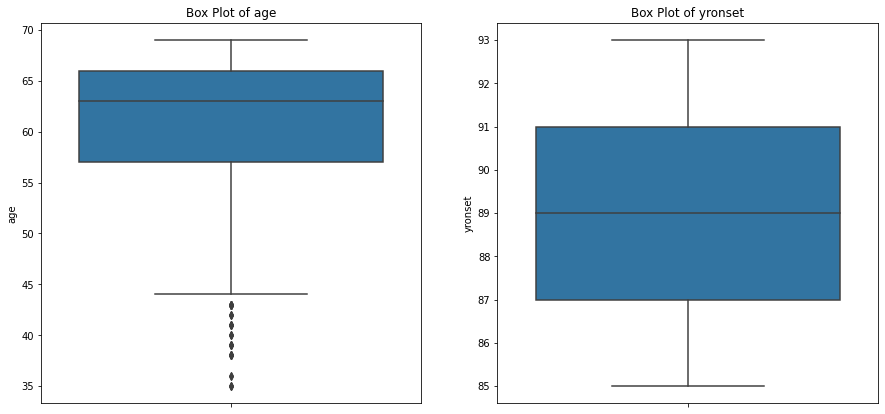

In [82]:
plt.figure(figsize=(15,7))
j=1
for i in mrt.columns:
    if mrt[i].dtype!="object":
        plt.subplot(1,2,j)
        sns.boxplot(y=mrt[i]);
        plt.title('Box Plot of '+i)
        j=j+1

In [83]:
mrt_num=mrt[['age','yronset']]
q1=mrt_num.quantile(0.25)
q3=mrt_num.quantile(0.75)
iqr=q3-q1
ur=q3+1.5*iqr
lr=q1-1.5*iqr
d=pd.DataFrame(data=mrt_num[(mrt_num<lr)|(mrt_num>ur)].count().sort_values(ascending=False),columns=['No. of Outliers'])
d['Percentage of Outliers']=d['No. of Outliers']/mrt_num.shape[0]*100
d = d.rename_axis(index='Feature')
round(d,1)

,No. of Outliers,Percentage of Outliers
Feature,,
age,37,3.0
yronset,0,0.0


### Insights:

* There are few outliers (only 3%) in the age feature of the dataset.


## Univariate Analysis

### Histogram and Box Plots for Numeric Features

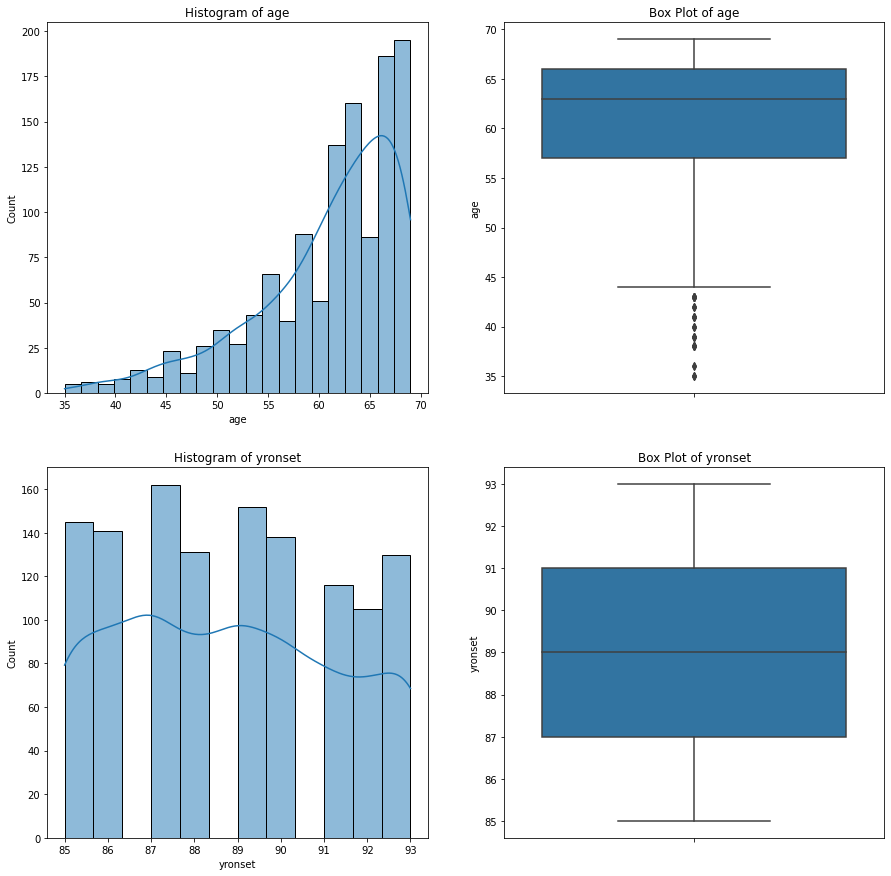

In [84]:
plt.figure(figsize=(15,15))
j=1
for i in mrt.columns:
    if mrt[i].dtype!='object':
        plt.subplot(2,2,j)
        sns.histplot(mrt[i],kde=True);
        plt.title('Histogram of '+i)
        k=j+1
        plt.subplot(2,2,k)
        sns.boxplot(y=mrt[i]);
        plt.title('Box Plot of '+i)
        j=k+1

### Skewness

In [85]:
pd.DataFrame(mrt.skew(),columns=["Skewness"]).rename_axis(index='Feature').round(2)

,Skewness
Feature,
age,-1.16
yronset,0.13


### Kurtosis

In [86]:
pd.DataFrame(mrt.kurtosis(),columns=["Kurtosis"]).rename_axis(index='Feature').round(2)

,Kurtosis
Feature,
age,0.95
yronset,-1.16


### Insights:
From above plots and tables, we can conclude below points,
1.	Age feature has left skewed distribution (Negatively skewed). Yronset has right skewed distribution (Positively skewed).
2.	Age feature has positive kurtosis and yronset has negative kurtosis.

## Count Plot of Outcome

In [87]:
mrt.outcome.value_counts(normalize=True).round(2)*100

live    74.0
dead    26.0
Name: outcome, dtype: float64

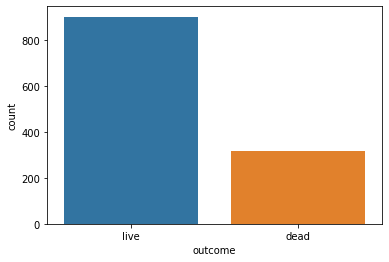

In [88]:
sns.countplot(x=mrt.outcome);

### Insights:
* Count plot for Outcome (Target) is drawn to check the balance of classes in target feature.
* In this dataset, we have enough number entries for both (live and dead) classes.

## Bivariate Analysis

### Pair Plot for Numeric Features

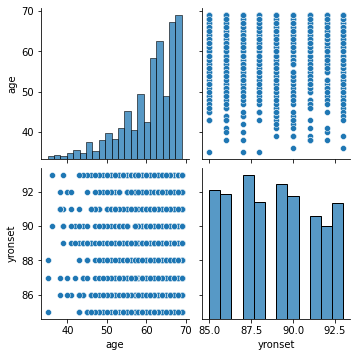

In [89]:
sns.pairplot(data=mrt);

### Heat Map

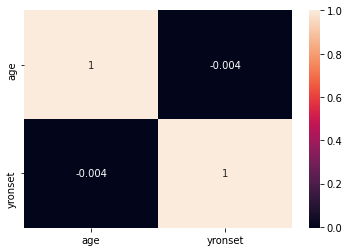

In [90]:
sns.heatmap(mrt.corr(),annot=True);

### Insights:
* There is no correlation between the variables

### Count Plots of Outcome with Categorical Features

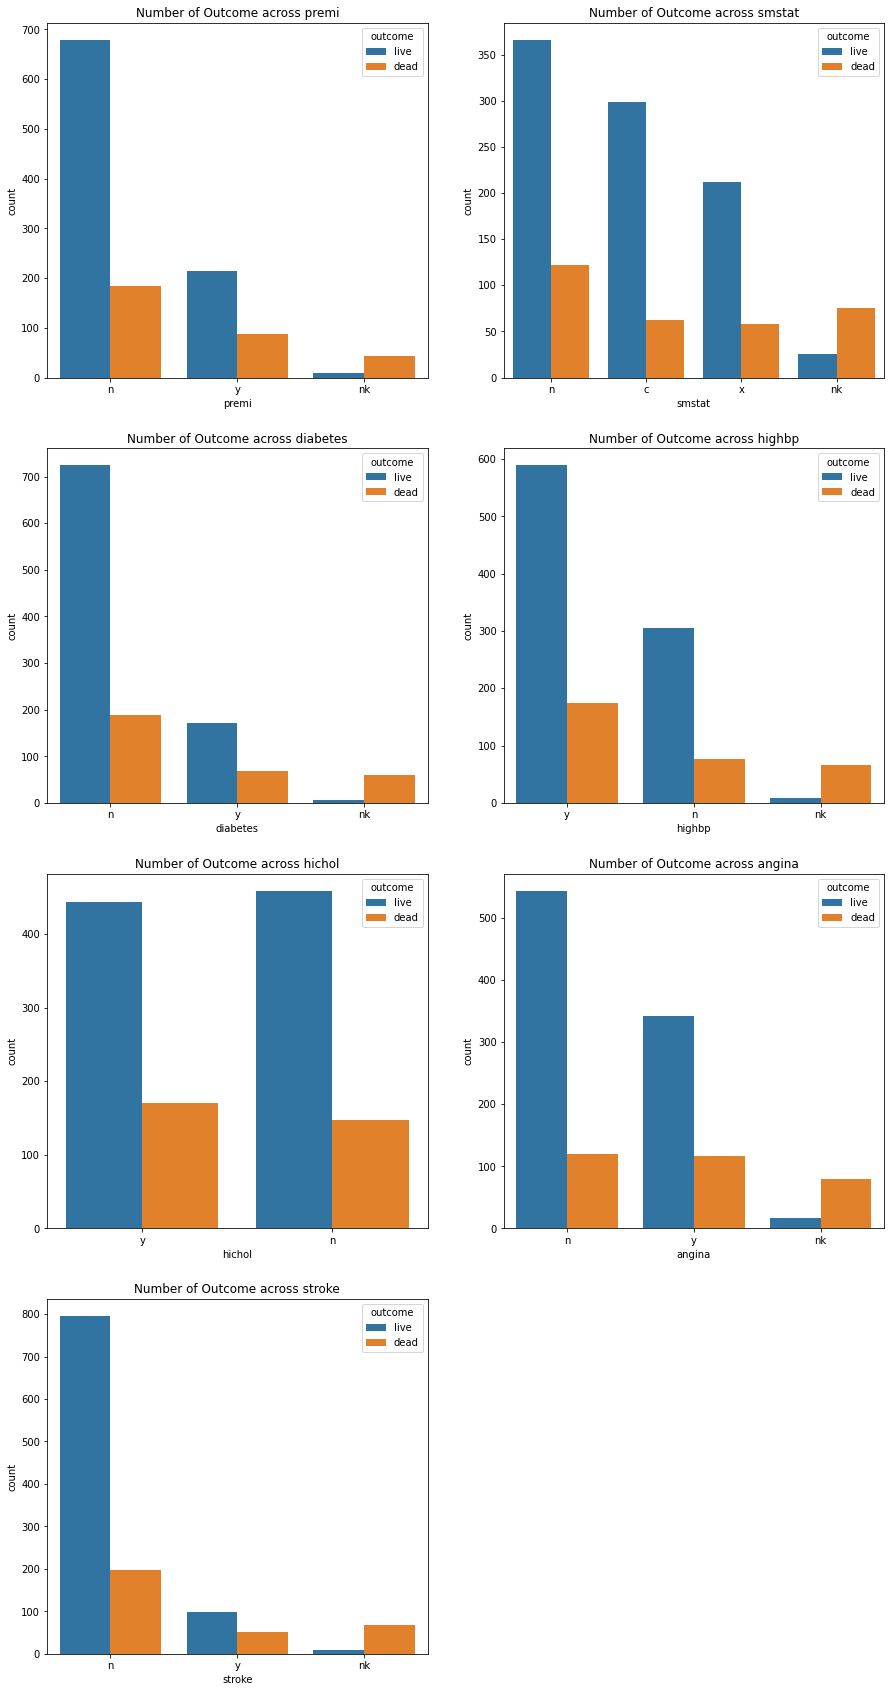

In [91]:
plt.figure(figsize=(15,30))
j=1
for i in mrt.columns.drop('outcome'):
    if mrt[i].dtype=='object':
        plt.subplot(4,2,j)
        f=mrt[i].value_counts().sort_values(ascending=False)
        sns.countplot(x=mrt[i],hue=mrt.outcome,order=f.index);
        plt.title('Number of Outcome across '+i)
        j=j+1

### Insights:
1.	There is maximum no. of women with no previous myocardial infarction event and minimum no. of women with previous myocardial infarction event not known. In previous myocardial infarction not known category, there are more no. of dead than live.
2.	There is more no. of women with non-smoke category and a smaller number of women in smoking status not known category. In smoking status not known category, there are more no. of dead than live.
3.	There is more no. of women with non-diabetic category and a smaller number of women in diabetes not known category. In diabetes status not known category, there are more no. of dead than live.
4.	There is more no. of women with non-high BP category and a smaller number of women in high BP not known category. In high BP status not known category, there are more no. of dead than live.
5.	There is more no. of women with high cholesterol category and a smaller number of women in no high cholesterol category.
6.	There is more no. of women with non-stroke category and a smaller number of women in stroke not known category. In stroke not known category, there are more no. of dead than live.

### Bar Plots of Continuous Features with Outcome

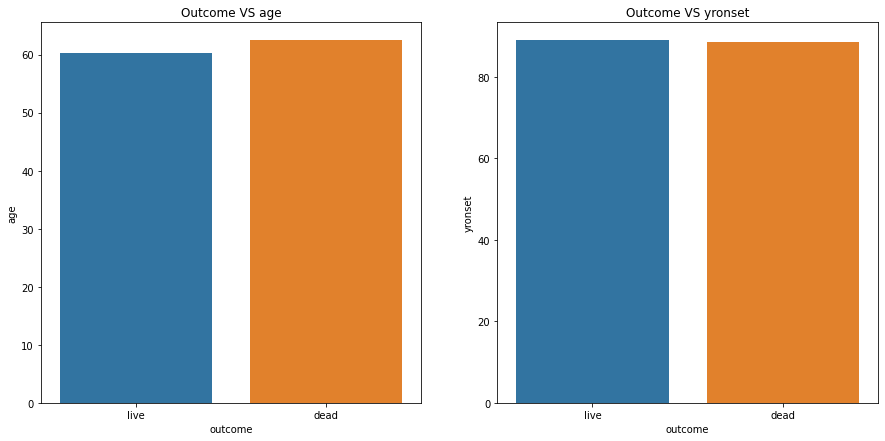

In [92]:
plt.figure(figsize=(15,7))
j=1
for i in mrt.columns:
    if mrt[i].dtype!='object':
        plt.subplot(1,2,j)
        sns.barplot(y=mrt[i],x=mrt.outcome,ci=False);
        plt.title('Outcome VS '+i)
        j=j+1

### Insights:
1.	Mean age of women who are dead is almost equal to as that of who are live.
2.	Mean year of onset of women who are dead is almost equal to as that of who are live.

## Q 2.2 Encode the data (having string values) for Modelling. Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network.

### Converting Categorical Features into Codes

In [93]:
encoded=mrt.copy()

In [94]:
encoded.outcome=np.where(encoded.outcome=='dead',1,0)

In [95]:
for i in encoded.columns: 
    if encoded[i].dtype == 'object':
        print('----------------')
        print('Feature:',i)
        print(encoded[i].unique())
        print(pd.Categorical(encoded[i].unique()).codes)
        encoded[i]=pd.Categorical(encoded[i]).codes

----------------
Feature: premi
['n' 'y' 'nk']
[0 2 1]
----------------
Feature: smstat
['x' 'c' 'nk' 'n']
[3 0 2 1]
----------------
Feature: diabetes
['n' 'nk' 'y']
[0 1 2]
----------------
Feature: highbp
['y' 'nk' 'n']
[2 1 0]
----------------
Feature: hichol
['y' 'n']
[1 0]
----------------
Feature: angina
['n' 'y' 'nk']
[0 2 1]
----------------
Feature: stroke
['n' 'nk' 'y']
[0 1 2]


In [96]:
pd.DataFrame(encoded.dtypes,columns=['Data Type']).rename_axis(index=('Feature'))

,Data Type
Feature,
outcome,int32
age,int64
yronset,int64
premi,int8
smstat,int8
diabetes,int8
highbp,int8
hichol,int8
angina,int8


In [97]:
encoded.head()

,outcome,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
0,0,63,85,0,3,0,2,1,0,0
1,0,55,85,0,0,0,2,1,0,0
2,0,68,85,2,2,1,2,1,2,0
3,0,64,85,0,3,0,2,0,2,0
4,1,67,85,0,2,1,1,1,1,1


### Splitting the Dataset into Independent and Dependent Features

In [98]:
x=encoded.drop('outcome',axis=1)
y=encoded['outcome']

In [99]:
x.head()

,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
0,63,85,0,3,0,2,1,0,0
1,55,85,0,0,0,2,1,0,0
2,68,85,2,2,1,2,1,2,0
3,64,85,0,3,0,2,0,2,0
4,67,85,0,2,1,1,1,1,1


In [100]:
y.head(10)

0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    1
8    1
9    1
Name: outcome, dtype: int32

### Proportion of 1s and 0s

In [101]:
round(y.value_counts(normalize=True)*100,1)

0    74.0
1    26.0
Name: outcome, dtype: float64

* There is no issue of class imbalance here as we have reasonable proportions in both the classes

### Splitting the Data into Train and Test Sets

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=1)

### Checking the Training and Test Data

In [104]:
print('Size of xtrain:', xtrain.shape)
print('Size of xtest:', xtest.shape)
print('Size of ytrain:', ytrain.shape)
print('Size of ytest:', ytest.shape)

Size of xtrain: (817, 9)
Size of xtest: (403, 9)
Size of ytrain: (817,)
Size of ytest: (403,)


In [105]:
xtrain.head()

,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
780,48,89,1,2,1,1,1,1,1
886,57,90,0,1,0,0,0,0,0
73,65,85,0,1,2,2,1,0,0
117,62,85,0,0,0,2,0,0,0
1092,69,92,0,1,0,2,1,1,0


In [106]:
xtest.head()

,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
1059,60,92,0,0,0,0,0,0,0
553,67,89,2,0,0,0,1,0,0
594,61,90,2,0,0,2,1,1,0
267,55,86,2,3,2,2,0,2,2
81,60,85,0,1,0,0,1,2,0


In [107]:
ytrain.head()

780     1
886     0
73      0
117     0
1092    1
Name: outcome, dtype: int32

In [108]:
ytest.head()

1059    0
553     1
594     0
267     0
81      0
Name: outcome, dtype: int32

In [109]:
round(ytrain.value_counts(normalize=True)*100,1)

0    74.1
1    25.9
Name: outcome, dtype: float64

In [110]:
round(ytest.value_counts(normalize=True)*100,1)

0    73.9
1    26.1
Name: outcome, dtype: float64

## Building Decision Tree Classifier Model (CART)

In [111]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [112]:
dtm=DecisionTreeClassifier(
                            max_depth=None,
                            min_samples_split=30,
                            min_samples_leaf=10,
                            random_state=1)

In [113]:
dtm.fit(xtrain,ytrain)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=30,
                       random_state=1)

### Generating Tree

In [114]:
tf = open('tf.dot','w')
dot_data = tree.export_graphviz(dtm, 
                                out_file=tf, 
                                feature_names = xtrain.columns, 
                                class_names = ['Live', 'Dead'])
tf.close()

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
dtm=DecisionTreeClassifier(random_state=1)

In [117]:
hyper_param_cart={'max_depth':[5,6,7,8],
                    'min_samples_split':[30,45,60],
                    'min_samples_leaf':[10,15,20]}

In [118]:
gscv_cart=GridSearchCV( estimator=dtm,param_grid=hyper_param_cart,cv=5)

In [119]:
gscv_cart.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [30, 45, 60]})

In [120]:
gscv_cart.best_params_

{'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 60}

In [121]:
gsb_cart=gscv_cart.best_estimator_

### Feature Importance

In [122]:
h=pd.DataFrame(gsb_cart.feature_importances_,index=xtrain.columns,columns=['Importance'])
h = h.rename_axis(index='Feature')
h.sort_values('Importance',ascending=False).T.round(2)

Feature,stroke,age,yronset,smstat,premi,hichol,angina,diabetes,highbp
Importance,0.73,0.08,0.05,0.04,0.04,0.04,0.02,0.0,0.0


## Building Random Forest Model

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
rfm=RandomForestClassifier(oob_score=True,random_state=1)

In [125]:
hyper_param_rf={
    'n_estimators': [51,101,151],
    'max_features': [2,3,4],
    'max_depth': [5,6,7,8],
    'min_samples_split': [30,45,60],
    'min_samples_leaf': [10,15,20]}

In [126]:
gscv_rf=GridSearchCV(estimator=rfm,param_grid=hyper_param_rf,cv=5)

In [127]:
gscv_rf.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=1),
             param_grid={'max_depth': [5, 6, 7, 8], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [30, 45, 60],
                         'n_estimators': [51, 101, 151]})

In [128]:
gscv_rf.best_params_

{'max_depth': 6,
 'max_features': 3,
 'min_samples_leaf': 15,
 'min_samples_split': 30,
 'n_estimators': 51}

In [129]:
gsb_rf=gscv_rf.best_estimator_

In [130]:
L=pd.DataFrame(gsb_rf.feature_importances_,index=xtrain.columns,columns=['Importance'])
L = L.rename_axis(index='Feature')
L.sort_values('Importance',ascending=False).round(3)

,Importance
Feature,
stroke,0.281
angina,0.166
age,0.140
smstat,0.115
diabetes,0.110
yronset,0.088
premi,0.040
highbp,0.039
hichol,0.020


## Building Artificial Neural Network Model

### Splitting the Dataset into Independent and Dependent Features

In [131]:
xann=pd.get_dummies(mrt.drop('outcome',axis=1),drop_first=True)

In [132]:
xann.head()

,age,yronset,premi_nk,premi_y,smstat_n,smstat_nk,smstat_x,diabetes_nk,diabetes_y,highbp_nk,highbp_y,hichol_y,angina_nk,angina_y,stroke_nk,stroke_y
0,63,85,0,0,0,0,1,0,0,0,1,1,0,0,0,0
1,55,85,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,68,85,0,1,0,1,0,1,0,0,1,1,0,1,0,0
3,64,85,0,0,0,0,1,0,0,0,1,0,0,1,0,0
4,67,85,0,0,0,1,0,1,0,1,0,1,1,0,1,0


In [133]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: outcome, dtype: int32

### Splitting the Data into Train and Test Sets

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
xtrain_ann, xtest_ann, ytrain, ytest = train_test_split(xann, y, test_size=0.33, random_state=1)

### Checking the Training and Test Data

In [136]:
print('Size of xtrain_ann:', xtrain_ann.shape)
print('Size of xtest_ann:', xtest_ann.shape)
print('Size of ytrain:', ytrain.shape)
print('Size of ytest:', ytest.shape)

Size of xtrain_ann: (817, 16)
Size of xtest_ann: (403, 16)
Size of ytrain: (817,)
Size of ytest: (403,)


In [137]:
xtrain_ann.head()

,age,yronset,premi_nk,premi_y,smstat_n,smstat_nk,smstat_x,diabetes_nk,diabetes_y,highbp_nk,highbp_y,hichol_y,angina_nk,angina_y,stroke_nk,stroke_y
780,48,89,1,0,0,1,0,1,0,1,0,1,1,0,1,0
886,57,90,0,0,1,0,0,0,0,0,0,0,0,0,0,0
73,65,85,0,0,1,0,0,0,1,0,1,1,0,0,0,0
117,62,85,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1092,69,92,0,0,1,0,0,0,0,0,1,1,1,0,0,0


In [138]:
xtest_ann.head()

,age,yronset,premi_nk,premi_y,smstat_n,smstat_nk,smstat_x,diabetes_nk,diabetes_y,highbp_nk,highbp_y,hichol_y,angina_nk,angina_y,stroke_nk,stroke_y
1059,60,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0
553,67,89,0,1,0,0,0,0,0,0,0,1,0,0,0,0
594,61,90,0,1,0,0,0,0,0,0,1,1,1,0,0,0
267,55,86,0,1,0,0,1,0,1,0,1,0,0,1,0,1
81,60,85,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [139]:
from sklearn.preprocessing import MinMaxScaler

In [140]:
scaler = MinMaxScaler()
scaler.fit(xtrain_ann)
xtrain_ann_scaled = pd.DataFrame(scaler.transform(xtrain_ann),columns=xtrain_ann.columns)
xtest_ann_scaled  = pd.DataFrame(scaler.transform(xtest_ann),columns=xtest_ann.columns)

In [141]:
xtrain_ann_scaled

,age,yronset,premi_nk,premi_y,smstat_n,smstat_nk,smstat_x,diabetes_nk,diabetes_y,highbp_nk,highbp_y,hichol_y,angina_nk,angina_y,stroke_nk,stroke_y
0,0.382353,0.500,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.647059,0.625,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.882353,0.000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.794118,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.875,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,0.705882,0.500,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
813,0.735294,0.750,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
814,0.941176,1.000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
815,0.882353,0.125,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [142]:
xtest_ann_scaled

,age,yronset,premi_nk,premi_y,smstat_n,smstat_nk,smstat_x,diabetes_nk,diabetes_y,highbp_nk,highbp_y,hichol_y,angina_nk,angina_y,stroke_nk,stroke_y
0,0.735294,0.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.941176,0.500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.764706,0.625,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,0.588235,0.125,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.735294,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.823529,0.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
399,0.676471,0.875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
400,0.294118,0.375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
401,0.617647,0.750,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [143]:
from sklearn.neural_network import MLPClassifier

In [144]:
annm=MLPClassifier(random_state=1)

In [145]:
hyper_param_ann={
    'hidden_layer_sizes': [50,100,150],
    'tol': [0.01,0.001,0.0001],
    'max_iter': [500,1000,1500]}

In [146]:
gscv_ann=GridSearchCV(estimator=annm,param_grid=hyper_param_ann,cv=5)

In [147]:
gscv_ann.fit(xtrain_ann_scaled,ytrain)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [50, 100, 150],
                         'max_iter': [500, 1000, 1500],
                         'tol': [0.01, 0.001, 0.0001]})

In [148]:
gscv_ann.best_params_

{'hidden_layer_sizes': 100, 'max_iter': 500, 'tol': 0.001}

In [149]:
gsb_ann=gscv_ann.best_estimator_

## Q 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

# Decision Tree Classifier Model (CART)

In [150]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

## Predicting on Training Dataset

In [151]:
ytrain_pred_cart=gsb_cart.predict(xtrain)
ytrain_prob_cart=gsb_cart.predict_proba(xtrain)

### Model Evaluation Based on Train Set

### Confusion Matrix

In [152]:
pd.DataFrame(confusion_matrix(ytrain,ytrain_pred_cart),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,596,9
Actual 1,165,47


### Classification Report

In [153]:
m=pd.DataFrame(classification_report(ytrain,ytrain_pred_cart,output_dict=True)).T.round(2)
m

,precision,recall,f1-score,support
0,0.78,0.99,0.87,605.00
1,0.84,0.22,0.35,212.00
accuracy,0.79,0.79,0.79,0.79
macro avg,0.81,0.60,0.61,817.00
weighted avg,0.80,0.79,0.74,817.00


In [154]:
cart_train_precision=m.iloc[1,0]
cart_train_precision

0.84

In [155]:
cart_train_recall=m.iloc[1,1]
cart_train_recall

0.22

In [156]:
cart_train_f1=m.iloc[1,2]
cart_train_f1

0.35

### Accuracy

In [157]:
cart_train_acc=m.iloc[2,2]
cart_train_acc

0.79

### ROC AUC Score

In [158]:
cart_train_auc=roc_auc_score(ytrain,ytrain_prob_cart[:,1]).round(2)
print('ROC AUC Score: ',cart_train_auc)

ROC AUC Score:  0.77


### ROC Curve

In [159]:
cart_train_fpr, cart_train_tpr,cart_train_thresholds=roc_curve(ytrain,ytrain_prob_cart[:,1])

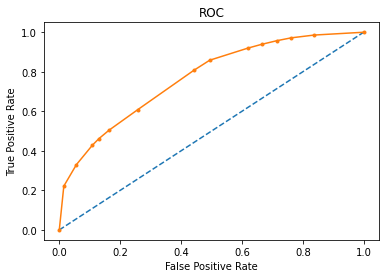

In [160]:
plt.plot([0, 1], [0, 1], linestyle='--');
plt.plot(cart_train_fpr, cart_train_tpr,marker='.');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');

## Predicting on Test Dataset

In [161]:
ytest_pred_cart=gsb_cart.predict(xtest)
ytest_prob_cart=gsb_cart.predict_proba(xtest)

### Model Evaluation Based on Test Set

### Confusion Matrix

In [162]:
pd.DataFrame(confusion_matrix(ytest,ytest_pred_cart),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,298,0
Actual 1,84,21


### Classification Report

In [163]:
n=pd.DataFrame(classification_report(ytest,ytest_pred_cart,output_dict=True)).T.round(2)
n

,precision,recall,f1-score,support
0,0.78,1.00,0.88,298.00
1,1.00,0.20,0.33,105.00
accuracy,0.79,0.79,0.79,0.79
macro avg,0.89,0.60,0.60,403.00
weighted avg,0.84,0.79,0.73,403.00


In [164]:
cart_test_precision=n.iloc[1,0]
cart_test_precision

1.0

In [165]:
cart_test_recall=n.iloc[1,1]
cart_test_recall

0.2

In [166]:
cart_test_f1=n.iloc[1,2]
cart_test_f1

0.33

### Accuracy

In [167]:
cart_test_acc=n.iloc[2,2]
cart_test_acc

0.79

### ROC AUC Score

In [168]:
cart_test_auc=roc_auc_score(ytest,ytest_prob_cart[:,1]).round(2)
print('ROC AUC Score: ',cart_test_auc)

ROC AUC Score:  0.65


### ROC Curve

In [169]:
cart_test_fpr, cart_test_tpr, cart_test_thresholds=roc_curve(ytest,ytest_prob_cart[:,1])

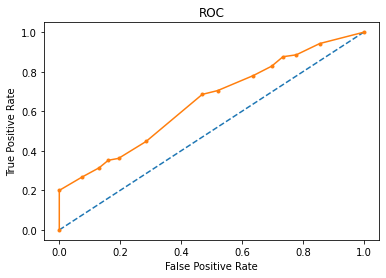

In [170]:
plt.plot([0, 1], [0, 1], linestyle='--');
plt.plot(cart_test_fpr, cart_test_tpr, marker='.');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');

### Conclusions:
1.	The performance metrics like precision, recall, F1 score, AUC Score and Accuracy for test dataset are approaching train dataset. Hence, there is no over fitting in the model.
2.	Accuracy of the model on test dataset (0.79) is more than 0.75. Hence, the model is considered as good model and can be used for predictions.
3.	ROC AUC Score of the model on test dataset (0.79) is more than 0.75. Hence, the model is considered as good model and can be used for predictions.
4.	Recall on test dataset is 0.2. This is very low. We should work on this metric to improve it by consulting with business.
5.	Precision on test dataset is 1. This is good enough to use the model for predictions.
6.	F1 score on test dataset is 0.33. This is not sufficient enough to use the model for predictions. We should consult with the business to check correctness of the data and to improve the F1 score.

# Random Forest Model

## Predicting on Training Dataset

In [171]:
ytrain_pred_rf=gsb_rf.predict(xtrain)
ytrain_prob_rf=gsb_rf.predict_proba(xtrain)

### Model Evaluation Based on Train Set

### Confusion Matrix

In [172]:
pd.DataFrame(confusion_matrix(ytrain,ytrain_pred_rf),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,600,5
Actual 1,164,48


### Classification Report

In [173]:
o=pd.DataFrame(classification_report(ytrain,ytrain_pred_rf,output_dict=True)).round(2).T
o

,precision,recall,f1-score,support
0,0.79,0.99,0.88,605.00
1,0.91,0.23,0.36,212.00
accuracy,0.79,0.79,0.79,0.79
macro avg,0.85,0.61,0.62,817.00
weighted avg,0.82,0.79,0.74,817.00


In [174]:
rf_train_precision=o.iloc[1,0]
rf_train_precision

0.91

In [175]:
rf_train_recall=o.iloc[1,1]
rf_train_recall

0.23

In [176]:
rf_train_f1=o.iloc[1,2]
rf_train_f1

0.36

### Accuracy

In [177]:
rf_train_acc=o.iloc[2,2]
rf_train_acc

0.79

### ROC AUC Score

In [178]:
rf_train_auc=roc_auc_score(ytrain,ytrain_prob_rf[:,1]).round(2)
print('ROC AUC Score: ', rf_train_auc)

ROC AUC Score:  0.82


### ROC Curve

In [179]:
rf_train_fpr,rf_train_tpr, rf_train_thresholds=roc_curve(ytrain,ytrain_prob_rf[:,1])

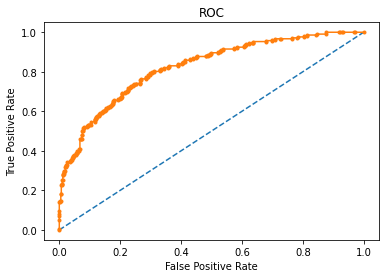

In [180]:
plt.plot([0, 1], [0, 1], linestyle='--');
plt.plot(rf_train_fpr,rf_train_tpr, marker='.');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');

## Predicting on Test Dataset

In [181]:
ytest_pred_rf=gsb_rf.predict(xtest)
ytest_prob_rf=gsb_rf.predict_proba(xtest)

### Model Evaluation Based on Test Set

### Confusion Matrix

In [182]:
pd.DataFrame(confusion_matrix(ytest,ytest_pred_rf),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,298,0
Actual 1,82,23


### Classification Report

In [183]:
p=pd.DataFrame(classification_report(ytest,ytest_pred_rf,output_dict=True)).round(2).T
p

,precision,recall,f1-score,support
0,0.78,1.00,0.88,298.0
1,1.00,0.22,0.36,105.0
accuracy,0.80,0.80,0.80,0.8
macro avg,0.89,0.61,0.62,403.0
weighted avg,0.84,0.80,0.74,403.0


In [184]:
rf_test_precision=p.iloc[1,0]
rf_test_precision

1.0

In [185]:
rf_test_recall=p.iloc[1,1]
rf_test_recall

0.22

In [186]:
rf_test_f1=p.iloc[1,2]
rf_test_f1

0.36

### Accuracy

In [187]:
rf_test_acc=p.iloc[2,2]
rf_test_acc

0.8

### ROC AUC Score

In [188]:
rf_test_auc=roc_auc_score(ytest,ytest_prob_rf[:,1]).round(2)
print('ROC AUC Score: ',rf_test_auc)

ROC AUC Score:  0.67


### ROC Curve

In [189]:
rf_test_fpr,rf_test_tpr, rf_test_thresholds=roc_curve(ytest,ytest_prob_rf[:,1])

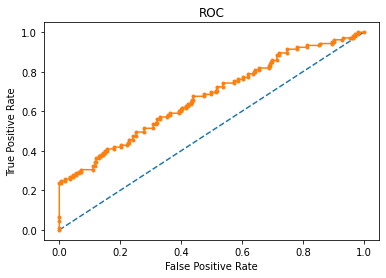

In [190]:
plt.plot([0, 1], [0, 1], linestyle='--');
plt.plot(rf_test_fpr,rf_test_tpr, marker='.');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');

### Conclusions:
1.	The performance metrics like precision, recall, F1 score, AUC Score and Accuracy for test dataset are approaching train dataset. Hence, there is no over fitting in the model.
2.	Accuracy of the model on test dataset (0.8) is more than 0.75. Hence, the model is considered as good model and can be used for predictions.
3.	ROC AUC Score of the model on test dataset (0.67) is little low. We should discuss with the business to improve this metric.
4.	Recall on test dataset is 0.22. This is little low. We should work on this metric to improve it by consulting with business.
5.	Precision on test dataset is 1. This is very high to use the model for predictions.
6.	F1 score on test dataset is 0.36. We should discuss with the business to improve this metric.

# Artificial Neural Network Model

## Predicting on Training Dataset

In [191]:
ytrain_pred_ann=gsb_ann.predict(xtrain_ann_scaled)
ytrain_prob_ann=gsb_ann.predict_proba(xtrain_ann_scaled)

### Model Evaluation Based on Train Set

### Confusion Matrix

In [192]:
pd.DataFrame(confusion_matrix(ytrain,ytrain_pred_ann),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,591,14
Actual 1,142,70


### Classification Report

In [193]:
q=pd.DataFrame(classification_report(ytrain,ytrain_pred_ann,output_dict=True)).round(2).T
q

,precision,recall,f1-score,support
0,0.81,0.98,0.88,605.00
1,0.83,0.33,0.47,212.00
accuracy,0.81,0.81,0.81,0.81
macro avg,0.82,0.65,0.68,817.00
weighted avg,0.81,0.81,0.78,817.00


In [194]:
ann_train_precision=q.iloc[1,0]
ann_train_precision

0.83

In [195]:
ann_train_recall=q.iloc[1,1]
ann_train_recall

0.33

In [196]:
ann_train_f1=q.iloc[1,2]
ann_train_f1

0.47

### Accuracy

In [197]:
ann_train_acc=q.iloc[2,2]
ann_train_acc

0.81

### ROC AUC Score

In [198]:
ann_train_auc=roc_auc_score(ytrain,ytrain_prob_ann[:,1]).round(2)
print('ROC AUC Score: ', ann_train_auc)

ROC AUC Score:  0.76


### ROC Curve

In [199]:
ann_train_fpr,ann_train_tpr, ann_train_thresholds=roc_curve(ytrain,ytrain_prob_ann[:,1])

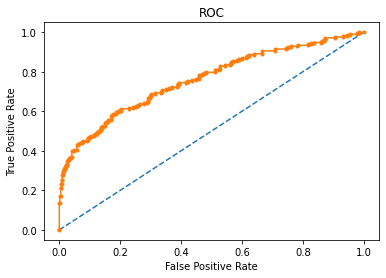

In [200]:
plt.plot([0, 1], [0, 1], linestyle='--');
plt.plot(ann_train_fpr,ann_train_tpr, marker='.');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');

## Predicting on Test Dataset

In [201]:
ytest_pred_ann=gsb_ann.predict(xtest_ann_scaled)
ytest_prob_ann=gsb_ann.predict_proba(xtest_ann_scaled)

### Model Evaluation Based on Test Set

### Confusion Matrix

In [202]:
pd.DataFrame(confusion_matrix(ytest,ytest_pred_ann),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,282,16
Actual 1,77,28


### Classification Report

In [203]:
r=pd.DataFrame(classification_report(ytest,ytest_pred_ann,output_dict=True)).round(2).T
r

,precision,recall,f1-score,support
0,0.79,0.95,0.86,298.00
1,0.64,0.27,0.38,105.00
accuracy,0.77,0.77,0.77,0.77
macro avg,0.71,0.61,0.62,403.00
weighted avg,0.75,0.77,0.73,403.00


In [204]:
ann_test_precision=r.iloc[1,0]
ann_test_precision

0.64

In [205]:
ann_test_recall=r.iloc[1,1]
ann_test_recall

0.27

In [206]:
ann_test_f1=r.iloc[1,2]
ann_test_f1

0.38

### Accuracy

In [207]:
ann_test_acc=r.iloc[2,2]
ann_test_acc

0.77

### ROC AUC Score

In [208]:
ann_test_auc=roc_auc_score(ytest,ytest_prob_ann[:,1]).round(2)
print('ROC AUC Score:', ann_test_auc)

ROC AUC Score: 0.67


### ROC Curve

In [209]:
ann_test_fpr,ann_test_tpr, ann_test_thresholds=roc_curve(ytest,ytest_prob_ann[:,1])

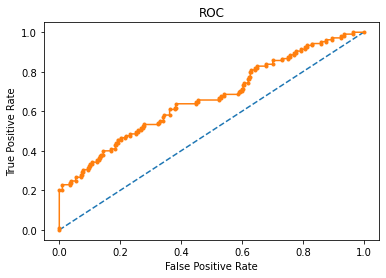

In [210]:
plt.plot([0, 1], [0, 1], linestyle='--');
plt.plot(ann_test_fpr,ann_test_tpr, marker='.');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');

### Conclusion:
1.	The performance metrics like precision, recall, F1 score, AUC Score and Accuracy for test dataset are approaching train dataset. Hence, there is no over fitting in the model.
2.	Accuracy of the model on test dataset (0.77) is more than 0.75. Hence, the model is considered as good model and can be used for predictions.
3.	ROC AUC Score of the model on test dataset (0.81) is more than 0.75. Hence, the model is considered as good model and can be used for predictions.
4.	Recall on test dataset is 0.27. This is little low. We should work on this metric to improve it by consulting with business.
5.	Precision on test dataset is 0.64. This is sufficient enough to use the model for predictions.
6.	F1 score on test dataset is 0.38. This is little low. We should work on this metric to improve it by consulting with business.

### Importance of Performance Metrics:
1. F1 score is a harmonic mean of recall and precision and it is more important than recall and precision. Because F1 score takes care of both of them. If either recall or precision decreases, F1 score automatically decreases drastically. Hence, F1 score is most important metric in evaluating model performance and deciding validity of the model.
2. In this model, Recall is more important than precision. If the prediction is live but in actual if it is dead (False Negatives), it creates problem and it is not acceptable. To avoid this problem, we should reduce no. of false negatives by reducing the threshold value less than 0.5.
3. If the prediction is dead but in actual if it is live (False Positives), this scenario is not a problem.

## Q 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

In [211]:
index=['Accuracy', 'AUC', 'Precision','Recall','F1 Score']
table = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_precision,cart_train_recall,cart_train_f1],
        'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_precision,rf_train_recall,rf_train_f1],
        'Neural Network Train':[ann_train_acc,ann_train_auc,ann_train_precision,ann_train_recall,ann_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_precision,cart_test_recall,cart_test_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_precision,rf_test_recall,rf_test_f1],
        'Neural Network Test':[ann_test_acc,ann_test_auc,ann_test_precision,ann_test_recall,ann_test_f1]},index=index)
table.T

,Accuracy,AUC,Precision,Recall,F1 Score
CART Train,0.79,0.77,0.84,0.22,0.35
Random Forest Train,0.79,0.82,0.91,0.23,0.36
Neural Network Train,0.81,0.76,0.83,0.33,0.47
CART Test,0.79,0.65,1.00,0.20,0.33
Random Forest Test,0.80,0.67,1.00,0.22,0.36
Neural Network Test,0.77,0.67,0.64,0.27,0.38


### ROC Curve for the 3 models on the Training data

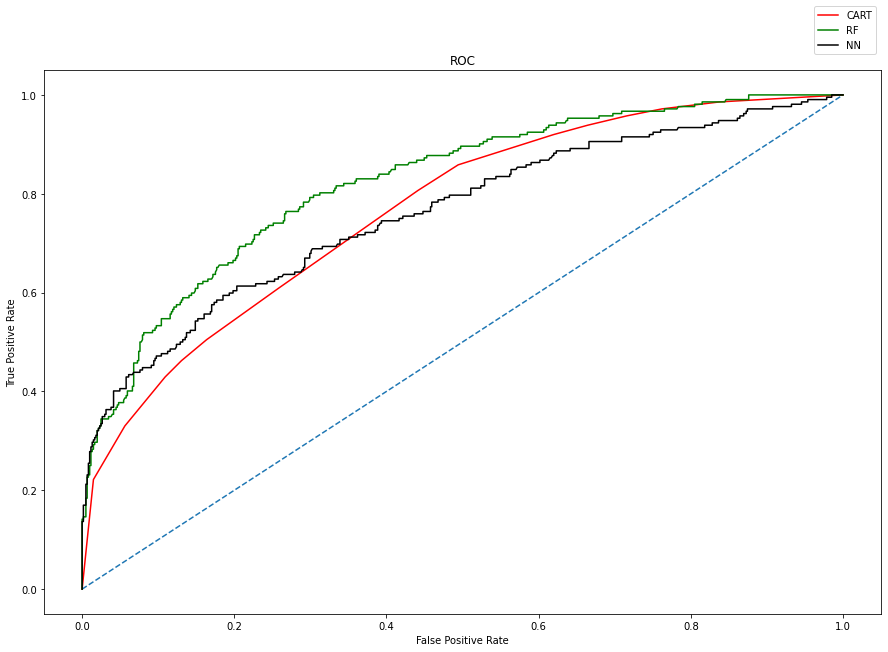

In [212]:
plt.figure(figsize=(15,10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(ann_train_fpr,ann_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### ROC Curve for the 3 models on the Test data

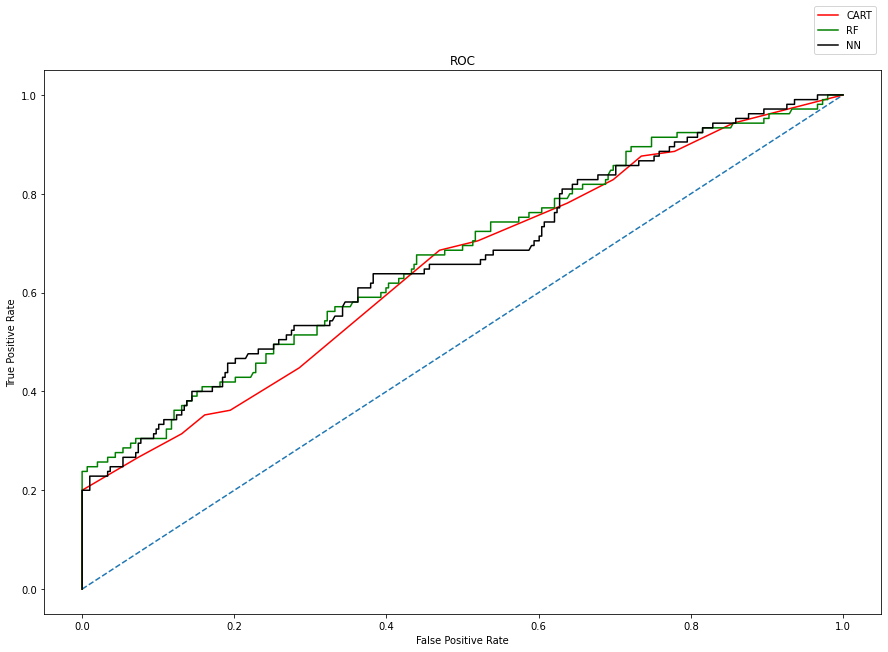

In [213]:
plt.figure(figsize=(15,10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(ann_test_fpr,ann_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### Inferences:
From above table and plot, we can derive below inferences.
1.	For all the models, the performance metrics of train dataset are approaching to the test dataset. Hence, there is no over fitting in any one of these models.
2.	The performance metrics of test datasets for all the models is almost equal and they are not significant enough to use for predictions. Anyway, Artificial Neural Network model is providing little better results (Recall and F1 Score) over CART and Random Forest models. Hence, Artificial Neural Network model is optimized among these three.


## Q 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations.

### Insights and Recommendations to business:
1.	For all the models, the performance metrics of train dataset are approaching to the test dataset. Hence, there is no over fitting in any one of these models.
2.	The performance metrics of test datasets for all the models is almost equal and but they are not significantly large enough to use for predictions. Hence, we should not use these models for predictions. We need to discuss with the business regarding the correctness of the data and threshold limit to improve recall and f1 score for all the models.
3.	Anyway, Artificial Neural Network model is providing little better results (Recall and F1 Score) over CART and Random Forest models. Hence, Artificial Neural Network model is optimized among these three.
4.	Threshold value can be decreased below 0.5 in all models to decrease false negatives and improve recall of the model. 
5.	Women who have previous myocardial infarction are more likely to die. In previous myocardial infarction not known category, there are more no. of dead than live. This category needs to be investigated further to get accurate effect.
6.	Smoking is not influencing much on death of women. But in smoking status not known category, there are more no. of dead than live. This category needs to be investigated further to get accurate effect smoking on death.
7.	Women with diabetes are more likely to die. But in diabetes status not known category, there are more no. of dead than live. This category needs to be investigated further to get accurate effect smoking on death.
8.	High BP is not influencing much on death of women. In high BP status not known category, there are more no. of dead than live. This category needs to be investigated further to get accurate effect High BP on death.
9.	Women with stroke history are more likely to die. In stroke not known category, there are more no. of dead than live. This category needs to be investigated further to get accurate effect stroke on death.